# Deep Learning - Lab05

In [22]:
import pandas as pd
import numpy as np

In [23]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [24]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [25]:
X_train.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, RANSACRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X_train)
y = y_train

#### I decided to use **Lasso** model to predict FGM value. The output of the following block will show: **Under X_poly's degree=1/2/3/4/5 and Lasso's alpha=0/0.001/0.01/0.1/1/10/100 condition, the MSE of train/test set.**

In [27]:
for d in [4]:
    poly = PolynomialFeatures(degree = d)
    X_poly = poly.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)

    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    for a in [0, 0.001, 0.01, 0.1, 1, 10, 100]:
        # log_rg = LogisticRegression(C = c, penalty = 'elasticnet', l1_ratio = 1, solver = 'saga', max_iter=1000)
        log_rg = Lasso(alpha = a)
        # log_rg = RANSACRegressor(LogisticRegression(C = c, penalty = 'elasticnet', l1_ratio = 1.0, solver = 'saga', max_iter=1000), 
        #     max_trials=1000, 
        #     min_samples=50, 
        #     residual_threshold=20.0, 
        #     random_state=0)
        log_rg.fit(X_train, y_train)

        y_train_pred = log_rg.predict(X_train)
        y_test_pred = log_rg.predict(X_test)

        print('\n[degree = %d]' % d)
        print('\n[alpha = %f]' % a )
        print('MSE train: %.4f, test: %.4f' % (
                        mean_squared_error(y_train, y_train_pred),
                        mean_squared_error(y_test, y_test_pred))) 
        # print('Accuracy train: %.4f, test: %.4f' % (
        #                 accuracy_score(y_train, y_train_pred),
        #                 accuracy_score(y_test, y_test_pred))) 

c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.866e+03, tolerance: 1.487e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in


[degree = 4]

[alpha = 0.000000]
MSE train: 0.2288, test: 0.2359


c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.133e+03, tolerance: 1.487e+00
  model = cd_fast.enet_coordinate_descent(



[degree = 4]

[alpha = 0.001000]
MSE train: 0.2299, test: 0.2326


c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.961e+03, tolerance: 1.487e+00
  model = cd_fast.enet_coordinate_descent(



[degree = 4]

[alpha = 0.010000]
MSE train: 0.2329, test: 0.2345

[degree = 4]

[alpha = 0.100000]
MSE train: 0.2430, test: 0.2434

[degree = 4]

[alpha = 1.000000]
MSE train: 0.2476, test: 0.2482

[degree = 4]

[alpha = 10.000000]
MSE train: 0.2477, test: 0.2483

[degree = 4]

[alpha = 100.000000]
MSE train: 0.2477, test: 0.2483


#### I found that when **X_poly's degree=3 and Lasso's alpha=0.001**, **MSE of train=0.2306, test=0.2323**, whose MSE of test is the lowest. In other words, performance of generalizability is better.

#### So I decided that for the rest part of assignment, I would fix the model and its hyperparameter as **Lasso** and one of its hyperparameter **alpha=0.001**. 

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Run the following code will generate the **error curve**.

c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.133e+03, tolerance: 1.487e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\User\anaconda3\envs\dataset2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.909e+03, tolerance: 1.487e+00
  model = cd_fast.enet_coordinate_descent(


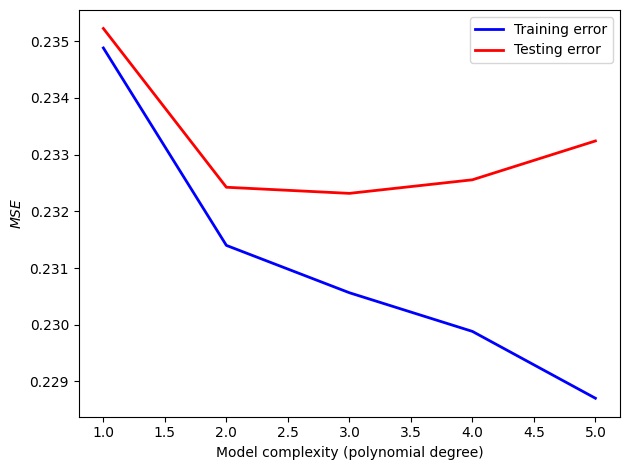

In [30]:
mse_train = []
mse_test = []

max_degree = 6

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)
    # X_train_poly = poly.fit_transform(x_train[:,newaxis]) == X_train
    # X_test_poly = poly.transform(x_test[:,newaxis]) == X_test
    
    # regr = LinearRegression()
    # regr = regr.fit(X_train_poly, y_train)
    # y_train_pred = regr.predict(X_train_poly)
    # y_test_pred = regr.predict(X_test_poly)

    log_rg = Lasso(alpha = 0.001)
    log_rg.fit(X_train, y_train)

    y_train_pred = log_rg.predict(X_train)
    y_test_pred = log_rg.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    

plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

#### According to the graph, we can see that the **testing error is the lowest at degree=3**, and after that, the testing error is increasing despite the training error is keep decreasing. So it's clear that **degree=3 is the best choice and NOT overfit**.

#### Then I apply **higher alpha value (alpha=0.1)** on Lasso to set higher penalty on L1 norm, thus make the weights among all features to be more sparse.
#### I filtered out the less related features (whose coefficient is less than 1e-4) and left top-3 significant features, which are **['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']**.

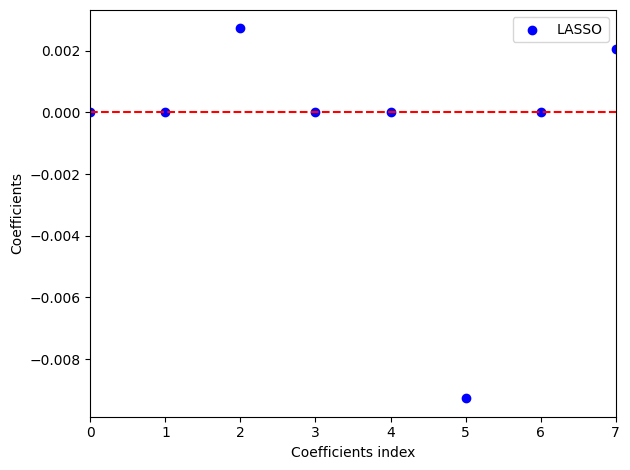

Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [70]:
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')

var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.1)
lr_lasso.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,7)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-4
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(X_train.columns.values[idxs]))

#### The following code will retrain the model selected in 2. with only top 3 features selected in 3.

In [71]:
selected_features = X_train.columns.values[idxs]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train_selected)
X_test_std = sc_x.fit_transform(X_test_selected)
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train_std)
X_test_poly = poly.fit_transform(X_test_std)


las = Lasso(alpha = 0.001)
las.fit(X_train_poly, y_train)
# print(X_train_poly.shape)

y_train_pred = las.predict(X_train_poly)
y_test_pred = las.predict(X_test_poly)

print('Training MSE:', mean_squared_error(y_train, y_train_pred))

Training MSE: 0.23192052098031746


#### The output training MSE is 0.2319 (compared to 0.2306 for all 8 features)

In [75]:
import csv

for i in range(len(y_test_pred)): # covert to 0 or 1
    if y_test_pred[i] > 0.5:
        y_test_pred[i] = 1
    else:
        y_test_pred[i] = 0

with open('./output/Lab05_109021115_y_pred.csv', 'w', newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['FGM'])
    for i in range(len(y_test_pred)):
        writer.writerow([int(y_test_pred[i])])

#### Report
In the begining, I saw that it's a classification problem, so I tried many classifiers as model, such as LogisticRegression, LogisticRegressionCV, SGDClassifier, etc. Then I found that this will make MSE too large since it always generate output either 0 or 1 (or nearly). Accordingly, I changed to the regression model -- Lasso, which has obviously lower MSE, helping me plot the graph with clearer outcome that I expected (The fact that over-high degree causes overfitting).
And since Lasso generates floating FGM(output) between 0 and 1, so in the end, I manually changed each testcase's output FGM to 1 if its origin value is > 0.5; and change to 0, otherwise.